# Matrixfactorisatie en dimensiereductie

### Analyseren klantprofielen op basis van uitgavenpatronen bij drie productcategorieën

#### Dataset

We gebruiken volgende dataset:

| Klant | Product A | Product B | Product C |
|-------|-----------|-----------|-----------|
| 1     |       100 |        50 |        30 |
| 2     | 200       | 150       | 120       |
| 3     | 50        | 20        |        10 |
| 4     | 300       | 200       |       180 |

Laten we deze dataset gebruiken voor verschillende methoden.

# 1. PCA (Principal Component Analysis)

**Doel**: Vind de belangrijkste richtingen waarin de data varieert, en reduceer dimensies.

**Stap 1**: Normaliseer de data (belangrijk voor PCA).<br>
**Stap 2**: Bepaal de belangrijkste componenten.<br>
**Stap 3**: Projecteer de data in een lagere dimensie.<br>

**Code**:

In [45]:
# Importeer de juiste libraries 
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Dataset
data = np.array([
    [100,50,30],
    [200,150,120],
    [50,20,10],
    [300,200,180]
])

# 1. Normaliseer de data
scaler = StandardScaler()
data_normalized = scaler.fit_transform(data)

# 2. Pas PCA toe
pca = PCA(n_components=2) # reduceer naar 2 dimensies
pca_data = pca.fit_transform(data_normalized)

print("Hoofdcomponenten:\n",pca.components_)
print("Data in lagere dimensie:\n", pca_data)

Hoofdcomponenten:
 [[ 0.57676189  0.57724112  0.57804706]
 [-0.77128498  0.61795707  0.15247471]]
Data in lagere dimensie:
 [[-1.27302513 -0.0856951 ]
 [ 0.87555836  0.15747355]
 [-1.97887555  0.01754198]
 [ 2.37634232 -0.08932043]]


In [46]:
print("De input data ziet er als volgt uit:\n", data)
print("---------------------------------------------")
print("De normalized data ziet er als volgt uit:\n", data_normalized)
print("---------------------------------------------")
print("De pca data ziet er als volgt uit:\n", pca_data)

De input data ziet er als volgt uit:
 [[100  50  30]
 [200 150 120]
 [ 50  20  10]
 [300 200 180]]
---------------------------------------------
De normalized data ziet er als volgt uit:
 [[-0.65094455 -0.75370758 -0.80013226]
 [ 0.39056673  0.61666984  0.50917508]
 [-1.1717002  -1.16482081 -1.09108945]
 [ 1.43207802  1.30185855  1.38204664]]
---------------------------------------------
De pca data ziet er als volgt uit:
 [[-1.27302513 -0.0856951 ]
 [ 0.87555836  0.15747355]
 [-1.97887555  0.01754198]
 [ 2.37634232 -0.08932043]]


**Uitleg**

- De data wordt genormaliseerd zodat alle waarden op dezelfde schaal zijn.
- PCA berekent nieuwe assen (componenten) waarop de data wordt geprojecteerd, met behoud van de belangrijkste variatie.
- De data wordt gereduceerd van 3D (A,B,C) naar 2D.

## 2. NMF (Niet-negatieve MatrixFactorisatie)

**Doel**: Ontdek verborgen thema’s of patronen (alleen positief).

**Stap 1**: Splits de matrix in twee kleinere matrices:<br>
	•	**W**: Wat klanten belangrijk vinden (bijv. thema’s).<br>
	•	**H**: Hoe de producten bijdragen aan die thema’s.<br>
    
**Stap 2**: Gebruik de matrices om nieuwe inzichten te krijgen.<br>

**Code**:

In [47]:
from sklearn.decomposition import NMF

# Pas NMF toe
nmf = NMF(n_components=2, init='random',random_state=0)
W = nmf.fit_transform(data)
H = nmf.components_

print("Matrix W (klantvoorkeuren):\n", W)
print("Matrix H (producteigenschappen):\n", H)

Matrix W (klantvoorkeuren):
 [[ 2.38491458  3.52063223]
 [15.80751019  2.08035237]
 [ 0.20912602  2.1964664 ]
 [21.83858785  3.78443518]]
Matrix H (producteigenschappen):
 [[ 9.89559549  7.9436424   7.40809634]
 [21.81256142  8.38631306  3.8180044 ]]


**Uitleg**:

- De dataset wordt opgesplitst in thema's (bijv. luxe vs budget)<br>
- Matrix W toont welke klanten welke thema's belangrijk vinden.<br>
- Matrix H laat zien welke producten bij welk thema horen.

## 3. t-SNE

**Doel**: Visualiseer hoge-dimensiedata in 2D of 3D.

**Stap 1**: Bereken afstanden tussen punten in hoge dimensies.<br>
**Stap 2**: Reduceer deze afstanden naar 2D voor visualisatie.

**Code**:

In [48]:
print(data)

[[100  50  30]
 [200 150 120]
 [ 50  20  10]
 [300 200 180]]


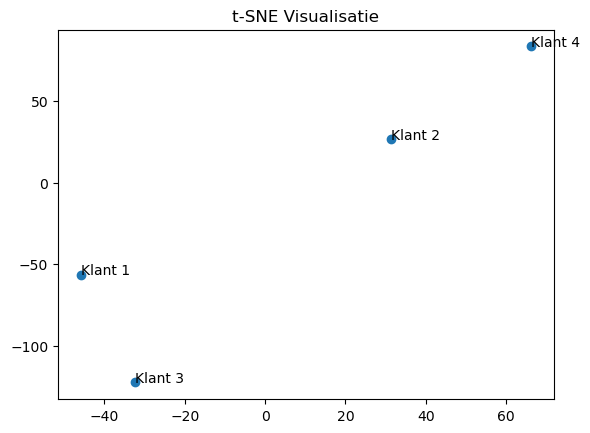

In [49]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Pas t-SNE toe
tsne = TSNE(n_components=2, random_state=0, perplexity=2)
tsne_data = tsne.fit_transform(data)

# Visualiseer de data
plt.scatter(tsne_data[:,0], tsne_data[:,1])

for i, txt in enumerate(['Klant 1', 'Klant 2','Klant 3','Klant 4']):
    plt.annotate(txt, (tsne_data[i,0], tsne_data[i,1]))

plt.title("t-SNE Visualisatie")
plt.show()


**Uitleg**:

- t-SNE behoudt de afstanden tussen klanten, zodat vergelijkbare klanten dichtbij elkaar worden geplaatst in een 2D-plot.<br>
- Deze methode is vooral handig voor clustering.

## 4. Auto-encoders

**Doel**: Reduceer dimensies via een neuraal netwerk.

**Stap 1**: Train een neuraal netwerk om de data te comprimeren en te reconstrueren.<br>
**Stap 2**: Gebruik de gecomprimeerde data voor verdere analyse.

**Code**:

In [50]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'  # Alleen waarschuwingen en fouten weergeven
%pip 

In [53]:
import tensorflow as tf
from tensorflow.keras import layers, models

# Bouw een auto-encoder
input_dim = data.shape[1]
encoding_dim = 2 # Reduceer naar 2 dimensies

input_layer = layers.input(shape=(input_dim,))
encoded = layers.Dense(encoding_dim, activation='relu')(input_layer)
decoded = layers.Dense(input_dim, activation = 'linear')(encoded)

autoencoder = models.Model(input_layer, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

# Train de auto-encoder
autoencoder.fit(data, data, epochs=100, verbose=0)

# Gebruik de encoder om gecomprimeerde data te krijgen
encoder = models.Model(input_layer, encoded)
compressed_data = encoder.predict(data)

print("Gecomprimeerde data:\n", compressed_data)


ModuleNotFoundError: No module named 'tensorflow'

**Uitleg**:

- De auto-encoder leert de belangrijkste patronen in de data en reduceert deze naar 2 dimensies.<br>
- De gecomprimeerde data kan gebruikt worden voor visualisatie of clustering.

## 5. LDA (Latent Dirichlet Allocation)

**Doel**: Ontdek onderwerpen in tekstdata.

Voorbeeld met tekstdata:
Stel, we hebben klantreviews:<br>
	•	Review 1: “De producten zijn goedkoop en van goede kwaliteit.”<br>
	•	Review 2: “Snelle levering en lage prijzen.”<br>
	•	Review 3: “Goede kwaliteit en fantastische klantenservice.”

**Code**: